<a href="https://colab.research.google.com/github/mervebudakk/python/blob/main/07_Bayesian_S%C4%B1n%C4%B1fland%C4%B1rmas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. BAYESİAN SINIFLANDIRMASI
Sınıflandırmanın genel amacı bir nitelik değerini,diğerlerini kullanarak belirlemektir.Veri dağılımına göre bir model elde edilir. Elde edilen bu model başarımı belirlendikten sonra niteliğin bilinmeyen değerini tahmin etmek için kullanılır.Bayes sınıflandırmasında;

Niteliklerin hepsi aynı derecede önem sahibi.

Nitelikler birbirlerinden bağımsızdır; yani bir nitelik değeri diğer bir nitelik değeri hakkında bilgi içermemektedir.

Çalışmada kullanılacak sınıflandırma renkler üzerinden gerçekleştirilecektir. Piksel değerinin gölge olarak nitelendirilmesi için o pikselin ve genel görüntü üzerinde yapılacak olasılık işlemlerinin sonuçlarına göre karar verilir.


##1.1. Bayesian Sınıflandırmanın Görüntüye Uygulanması

In [ ]:
#Google Drive'ınızı bağlamak için kullanılır.
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import requests
from PIL import Image
#PIL modülünden IMAGE kütüphanesini uygulamaya dahil edilir
from io import BytesIO

url = 'https://raw.githubusercontent.com/mervebudakk/python/master/images/bayesian.png'
response = requests.get(url)

image = Image.open(BytesIO(response.content))
#image değişkeninin içerisine belirtilen klasörde bulunan 'bayesian’' adlı resim dosyası atılır.

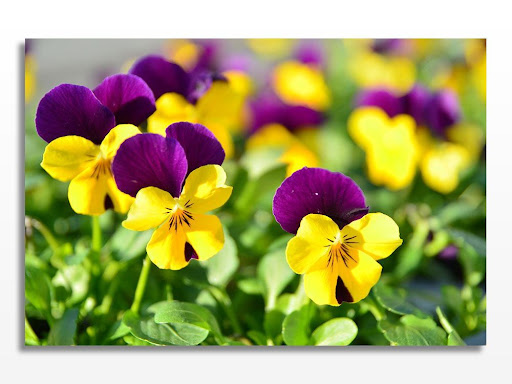

In [ ]:
#@title bayesian.jpg dosyanın orjinal hali
display(image)

In [ ]:
newmat = image.load()
#newmat adlı yeni bir matris oluşturulur ve  bunun içerisine resim dosyası yüklenir.

wdh = image.size[0]
#wgh değişkenine resim dosyasının genişlik boyutu atılır. Dosyanın genişliği 640 piksel.
hgh = image.size[1]
#hgh değişkenine resim dosyasının yükseklik boyutunu atılır. Dosyanın yüksekliği 360 piksel.


shapelist = [ [0]*hgh for x in range(wdh)]
#Bayes sınıflandırmasında kullanılacak listeler bulunacaktır. Bunlardan biri de gölge piksellerinin tutulacağı shapelist olacaktır.
r_list = [  [0]*hgh for x in range(wdh)]
#Görüntüde bulunan her renk için bir liste tutulacaktır. Daha sonra bu renkler karşılaştırılacak ve olasılıkları hesaplanıp bayes sınıflandırması yapılacaktır.
g_list = [  [0]*hgh for x in range(wdh)]

#Yeşil renk sınıfını tutan liste.
b_list = [  [0]*hgh for x in range(wdh)]
#Mavi renk sınıfını tutan liste.
for i in range(wdh):
#İç içe döngü ile görüntünün piksel renk kodları çekilir.
    for j in range(hgh):
        r,g,b = image.getpixel((i,j))
#Resimde bulunan her piksele ait r,g,b renk kodları getpiksel fonksiyonu ile alınır.
        r_list[i][j] = r
#Alınan her değer kendi listesine kaydedilir.
        g_list[i][j] = g
        b_list[i][j] = b
hist_r = [0] * 256

#Olasılık hesaplamasında kullanılacak olan histogramlar hazırlanır. Olasılık için gerekli olan frekans hesabını histogram ile gerçekleştirildiğinden  her renk kodu için ayrı bir histogram tutulacaktır.
hist_g = [0] * 256
#g_list için tutulan histogram.
hist_b = [0] * 256
#b_list için tutulan histogram.
for m in range(wdh):
#Listeler içerisine girilip her listenin histogramının belirlenmesi gereklidir. Bunun için iç içe döngüler kullanılır.
     for n in range(hgh):
        a=r_list[m][n]
#Her tutulan listenin piksel değeri alınıp bu sırasıyla değişkenlerde tutulur.
        b=g_list[m][n]
        c=b_list[m][n]
        hist_r[a]=hist_r[a]+1
#Histogram değerleri için bulunan değişkenler bir arttırılarak toplanır.
        hist_g[b]=hist_g[b]+1
        hist_b[c]=hist_b[c]+1
sum_r,sum_g,sum_b = 0,0,0
#Tüm histogram değerlerinin toplandığı sum değişkenleri tanımlandı.


for p in range (len(hist_r)-1):
#Kırmızı renk histogramının tüm değerleri indisi ile çarpılıp toplanır.
   sum_r=(hist_r[p]*p)+sum_r
for p in range(len(hist_g)-1):
#Mavi renk histogramının tüm değerleri indisi ile çarpılıp toplanır.
  sum_g=(hist_g[p]*p)+sum_g

for p in range(len(hist_b)-1):

   sum_b=(hist_b[p]*p)+sum_b

mean_r=int(sum_r/(wdh*hgh))

#Olasılıkların hesaplanması için tüm toplama, boyut bölünür ve ortalama değer hesaplanır.
mean_g=int(sum_g/(wdh*hgh))

mean_b=int(sum_b/(wdh*hgh))
poseb2=(float(hist_r[mean_r])/(hist_r[mean_r]+hist_g[mean_g]+hist_b[mean_b]))*(float(hist_g[mean_g])/(hist_r[mean_r]+hist_g[mean_g]+hist_b[mean_b]))*(float(hist_b[mean_b])/(hist_r[mean_r]+hist_g[mean_g]+hist_b[mean_b]))
for x in range(wdh):
#İkinci olasılık hesabı ve bu hesaba göre görüntünün değerinin hesaplanması için iç içe döngü oluşturulur.
   for y in range(hgh):
       poseb1=(hist_r[r_list[x][y]]/(hist_r[r_list[x][y]]+hist_b[b_list[x][y]]+hist_g[g_list[x][y]]+0.01))*(hist_g[g_list[x][y]]/(hist_r[r_list[x][y]]+hist_b[b_list[x][y]]+hist_g[g_list[x][y]]+0.01))*(hist_b[b_list[x][y]]/(hist_r[r_list[x][y]]+hist_b[b_list[x][y]]+hist_g[g_list[x][y]]+0.01))
       if(poseb1>poseb2):
#Listeler arası ortalama değer eğer daha büyükse histogram değerlerine göre görüntünün o bölgesine beyaz renk verilir.
           shapelist[x][y]=1
           newmat[x,y]=(255,255,255)
       else:
#Değilse siyah renk verilir.
             shapelist[x][y]=0
             newmat[x,y]=(0,0,0)
image.save("bayesian_yeni.jpg")
#Görüntünün son hali belirlenen klasöre kaydedilir.



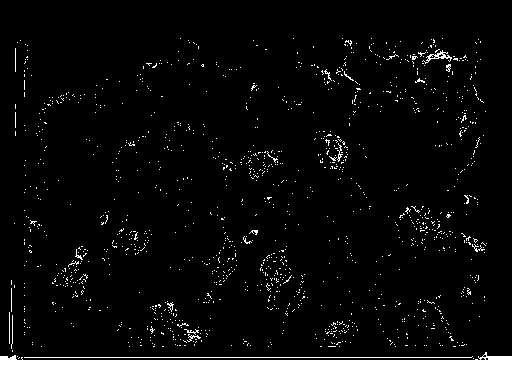

In [ ]:
#@title bayesian_yeni.jpg dosyası
display(image)